In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from preprocessingFunctionSIR import *

pd.set_option('display.max_rows',500)

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)


In [83]:
train=pd.read_csv('HousePrices/train.csv')

Step 1-EDA

In [84]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
train.shape

(1460, 81)

In [86]:
train.drop(['Id'],axis=1,inplace=True)

In [87]:
train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [88]:
train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [89]:
nullcols=[feature for feature in train.columns if train[feature].isnull().sum()>0]
nullcols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [90]:
train.apply(lambda x:x.isnull().sum())

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [91]:
train.shape[0]

1460

In [92]:
train.apply(lambda x:x.isnull().sum()/train.shape[0])

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating     

In [93]:
train.apply(lambda x:100*x.isnull().sum()/train.shape[0])

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [94]:
trainnullper=train.apply(lambda x:np.round(100*x.isnull().sum()/train.shape[0],2))
trainnullcount=train.isnull().sum()

In [95]:
pd.DataFrame([trainnullcount,trainnullper])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.0,0.0,259.00,0.0,0.0,1369.00,0.0,0.0,0.0,0.0,...,0.0,1453.00,1179.00,1406.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,17.74,0.0,0.0,93.77,0.0,0.0,0.0,0.0,...,0.0,99.52,80.75,96.3,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
trainnullDF=pd.DataFrame([trainnullcount,trainnullper]).T
trainnullDF

,0,1
MSSubClass,0.0,0.00
MSZoning,0.0,0.00
LotFrontage,259.0,17.74
LotArea,0.0,0.00
Street,0.0,0.00
Alley,1369.0,93.77
LotShape,0.0,0.00
LandContour,0.0,0.00
Utilities,0.0,0.00
LotConfig,0.0,0.00


In [97]:
trainnullDF.columns=['NullValues','NullPercentage']
trainnullDF

,NullValues,NullPercentage
MSSubClass,0.0,0.00
MSZoning,0.0,0.00
LotFrontage,259.0,17.74
LotArea,0.0,0.00
Street,0.0,0.00
Alley,1369.0,93.77
LotShape,0.0,0.00
LandContour,0.0,0.00
Utilities,0.0,0.00
LotConfig,0.0,0.00


In [98]:
trainnullDF.sort_values(by='NullValues',ascending=False,inplace=True)

In [99]:
trainnullDF

,NullValues,NullPercentage
PoolQC,1453.0,99.52
MiscFeature,1406.0,96.30
Alley,1369.0,93.77
Fence,1179.0,80.75
FireplaceQu,690.0,47.26
LotFrontage,259.0,17.74
GarageYrBlt,81.0,5.55
GarageCond,81.0,5.55
GarageType,81.0,5.55
GarageFinish,81.0,5.55


In [100]:
trainnullDF.reset_index(inplace=True)
trainnullDF.head()

,index,NullValues,NullPercentage
0,PoolQC,1453.0,99.52
1,MiscFeature,1406.0,96.30
2,Alley,1369.0,93.77
3,Fence,1179.0,80.75
4,FireplaceQu,690.0,47.26


In [101]:
#dropping the columns more than 50% of null values
train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [102]:
trainnullper=train.apply(lambda x:np.round(100*x.isnull().sum()/train.shape[0],2))
trainnullcount=train.isnull().sum()
trainnullDF=pd.DataFrame([trainnullcount,trainnullper]).T
trainnullDF.columns=['NullValues','NullPercentage']
trainnullDF.sort_values(by='NullValues',ascending=False,inplace=True)
trainnullDF.reset_index(inplace=True)
trainnullDF.head(10)

,index,NullValues,NullPercentage
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


In [103]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [104]:
trainnullDF.head(20)

,index,NullValues,NullPercentage
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


In [105]:
trainnullDF[:14]

,index,NullValues,NullPercentage
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


In [106]:
trainnullDF[:14]['index']

0      LotFrontage
1       GarageType
2      GarageYrBlt
3     GarageFinish
4       GarageQual
5       GarageCond
6     BsmtFinType2
7     BsmtExposure
8         BsmtQual
9         BsmtCond
10    BsmtFinType1
11      MasVnrArea
12      MasVnrType
13      Electrical
Name: index, dtype: object

In [107]:
nullcolumns=np.array(trainnullDF[:14]['index'])
nullcolumns

array(['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [109]:
for column in nullcolumns:
    if train[column].dtype=='object':
        print(column)
    else:
        print(f'{column} is numerical')    

LotFrontage is numerical
GarageType
GarageYrBlt is numerical
GarageFinish
GarageQual
GarageCond
BsmtFinType2
BsmtExposure
BsmtQual
BsmtCond
BsmtFinType1
MasVnrArea is numerical
MasVnrType
Electrical


In [110]:
for column in nullcolumns:
    if train[column].dtype=='object':
        print(column)
        train[column].fillna(train[column].mode()[0],inplace=True)
    else:
        print(f'{column} is numerical')
        train[column].fillna(train[column].median(),inplace=True)

LotFrontage is numerical
GarageType
GarageYrBlt is numerical
GarageFinish
GarageQual
GarageCond
BsmtFinType2
BsmtExposure
BsmtQual
BsmtCond
BsmtFinType1
MasVnrArea is numerical
MasVnrType
Electrical


In [111]:
trainnullper=train.apply(lambda x:np.round(100*x.isnull().sum()/train.shape[0],2))
trainnullcount=train.isnull().sum()
trainnullDF=pd.DataFrame([trainnullcount,trainnullper]).T
trainnullDF.columns=['NullValues','NullPercentage']
trainnullDF.sort_values(by='NullValues',ascending=False,inplace=True)
trainnullDF.reset_index(inplace=True)
trainnullDF.head(10)

,index,NullValues,NullPercentage
0,MSSubClass,0.0,0.0
1,GarageYrBlt,0.0,0.0
2,Fireplaces,0.0,0.0
3,Functional,0.0,0.0
4,TotRmsAbvGrd,0.0,0.0
5,KitchenQual,0.0,0.0
6,KitchenAbvGr,0.0,0.0
7,BedroomAbvGr,0.0,0.0
8,HalfBath,0.0,0.0
9,FullBath,0.0,0.0


In [112]:
train.select_dtypes(include=np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [113]:
numericalcolumns=train.select_dtypes(include=np.number).columns
numericalcolumns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [114]:
objectcolumns=train.select_dtypes(include=np.object0).columns
objectcolumns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

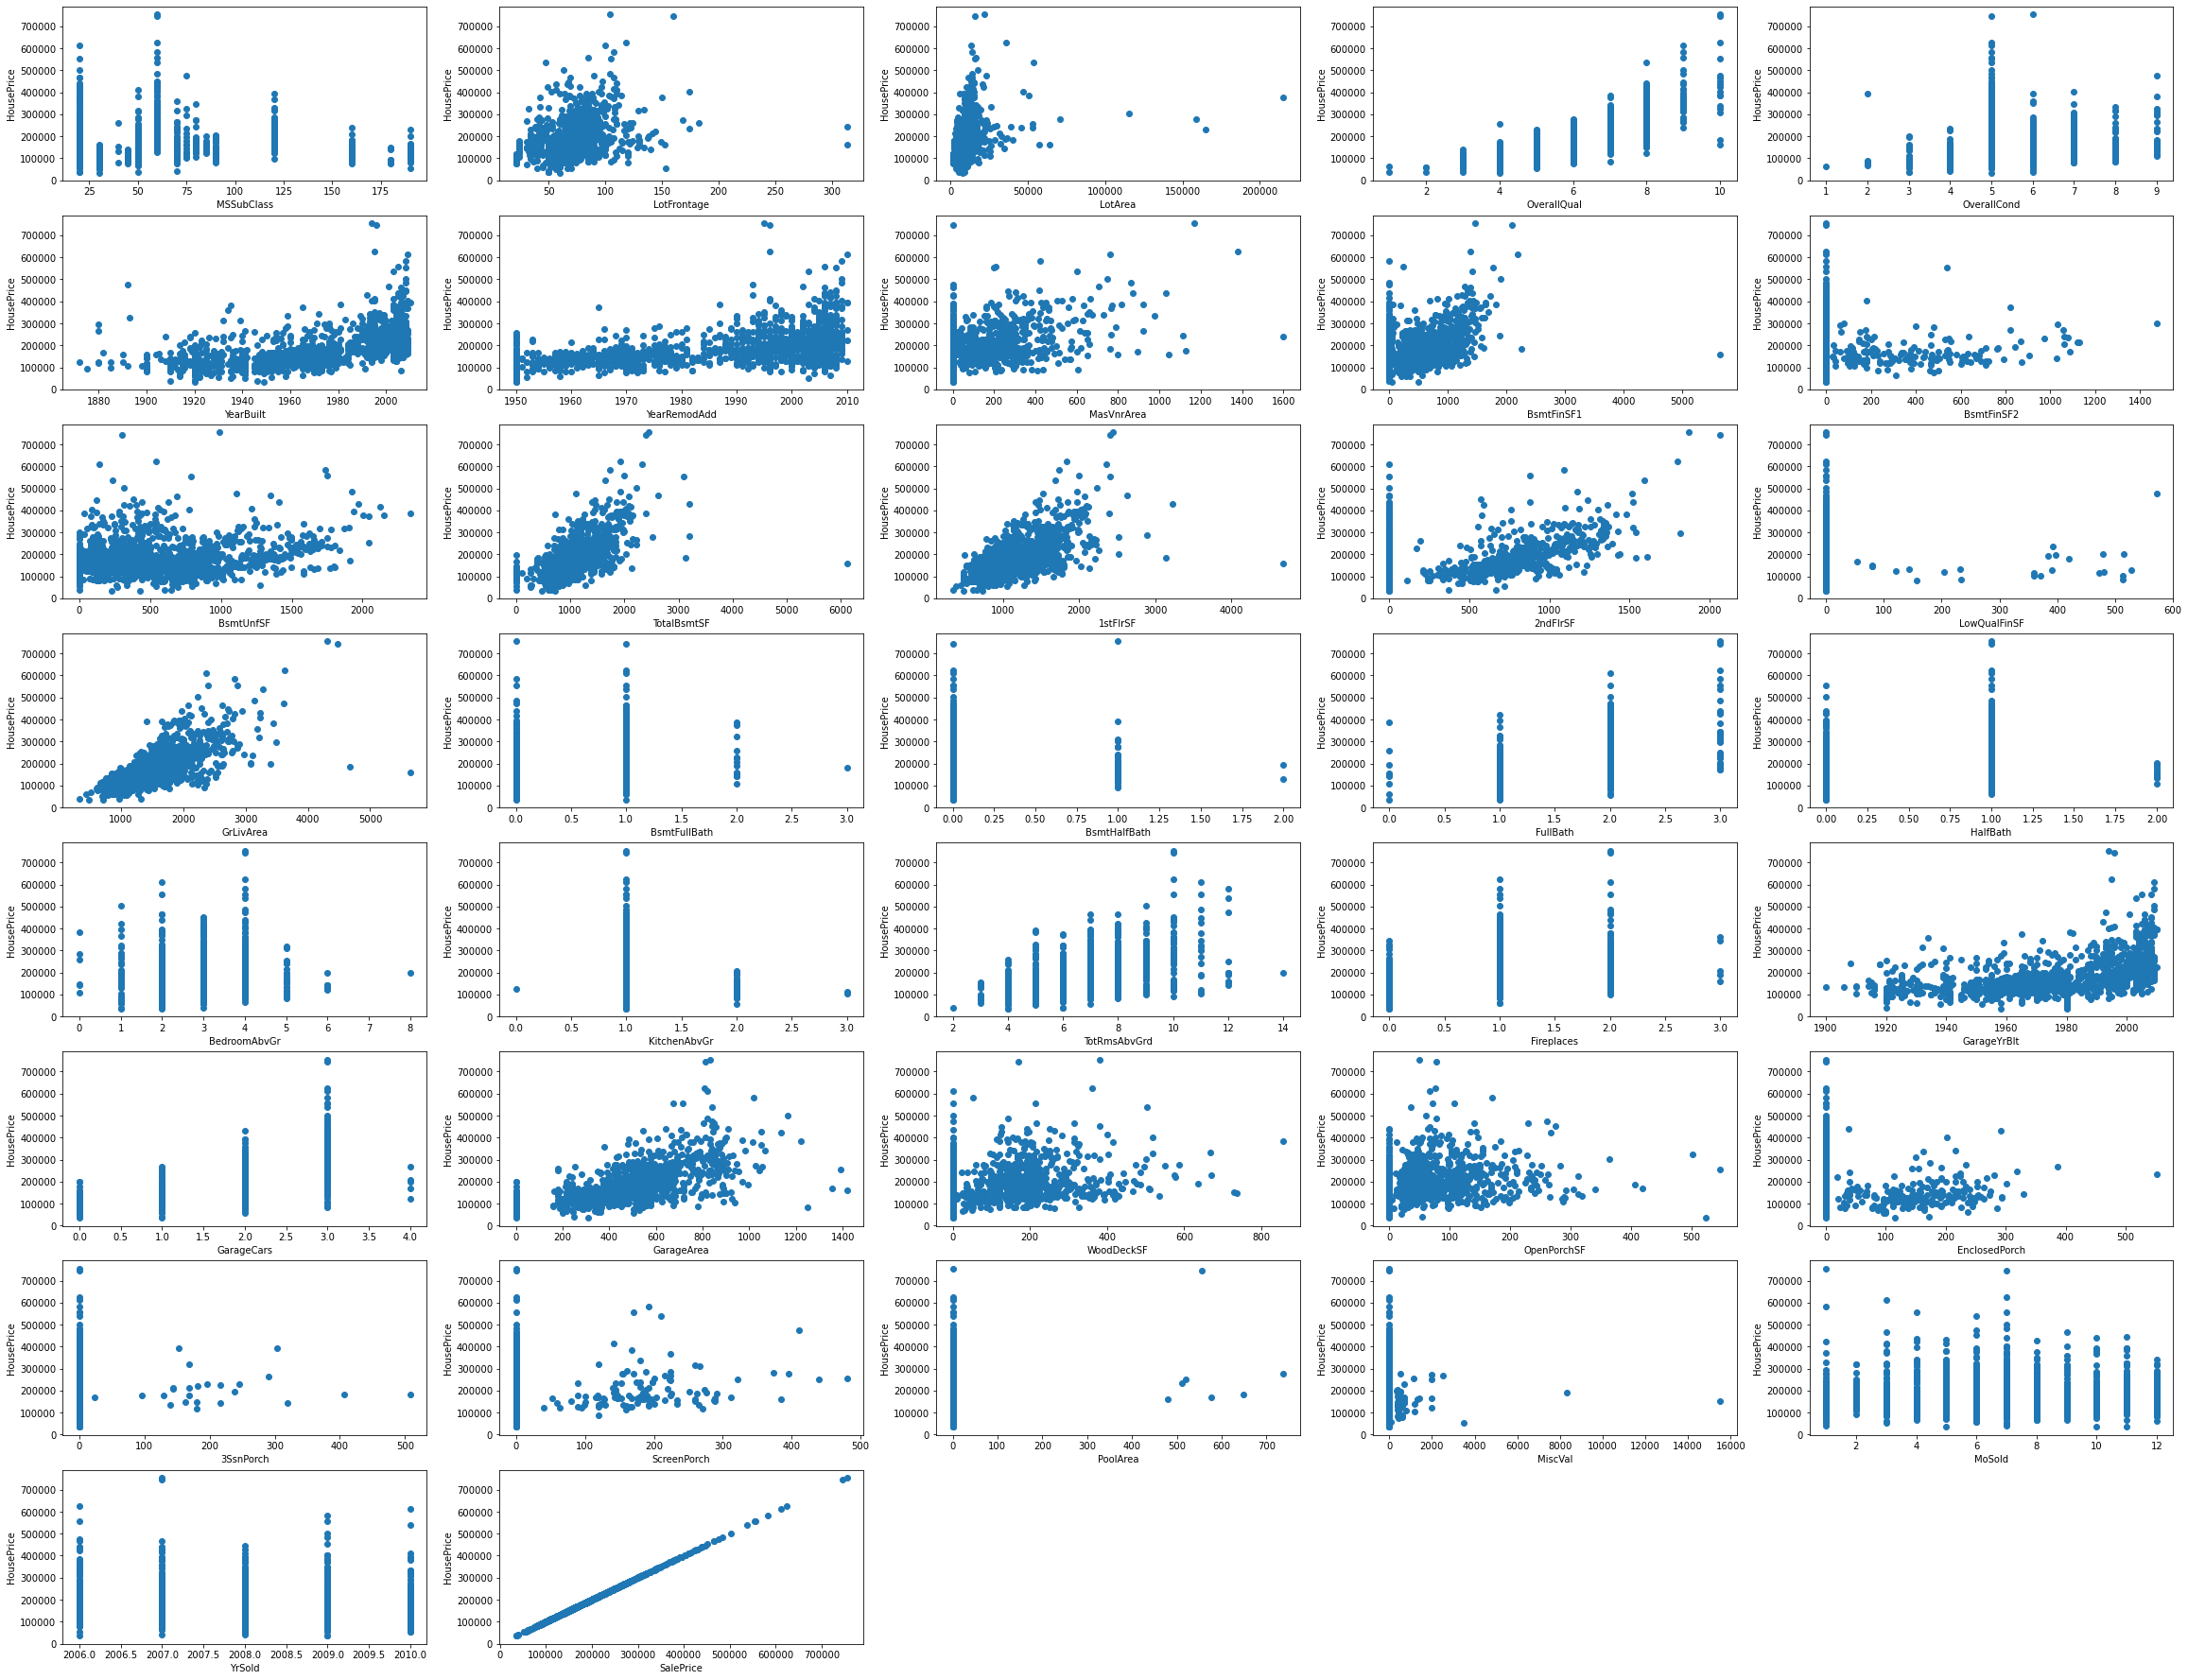

In [115]:
j=0
plt.figure(figsize=(40,40))
for column in numericalcolumns:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('HousePrice')
    j+=1

In [116]:
descretecols=[]
continouscols=[]
for column in numericalcolumns:
    if train[column].nunique()>20:
        continouscols.append(column)
    else:
        descretecols.append(column)  


In [117]:
 continouscols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [118]:
  descretecols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

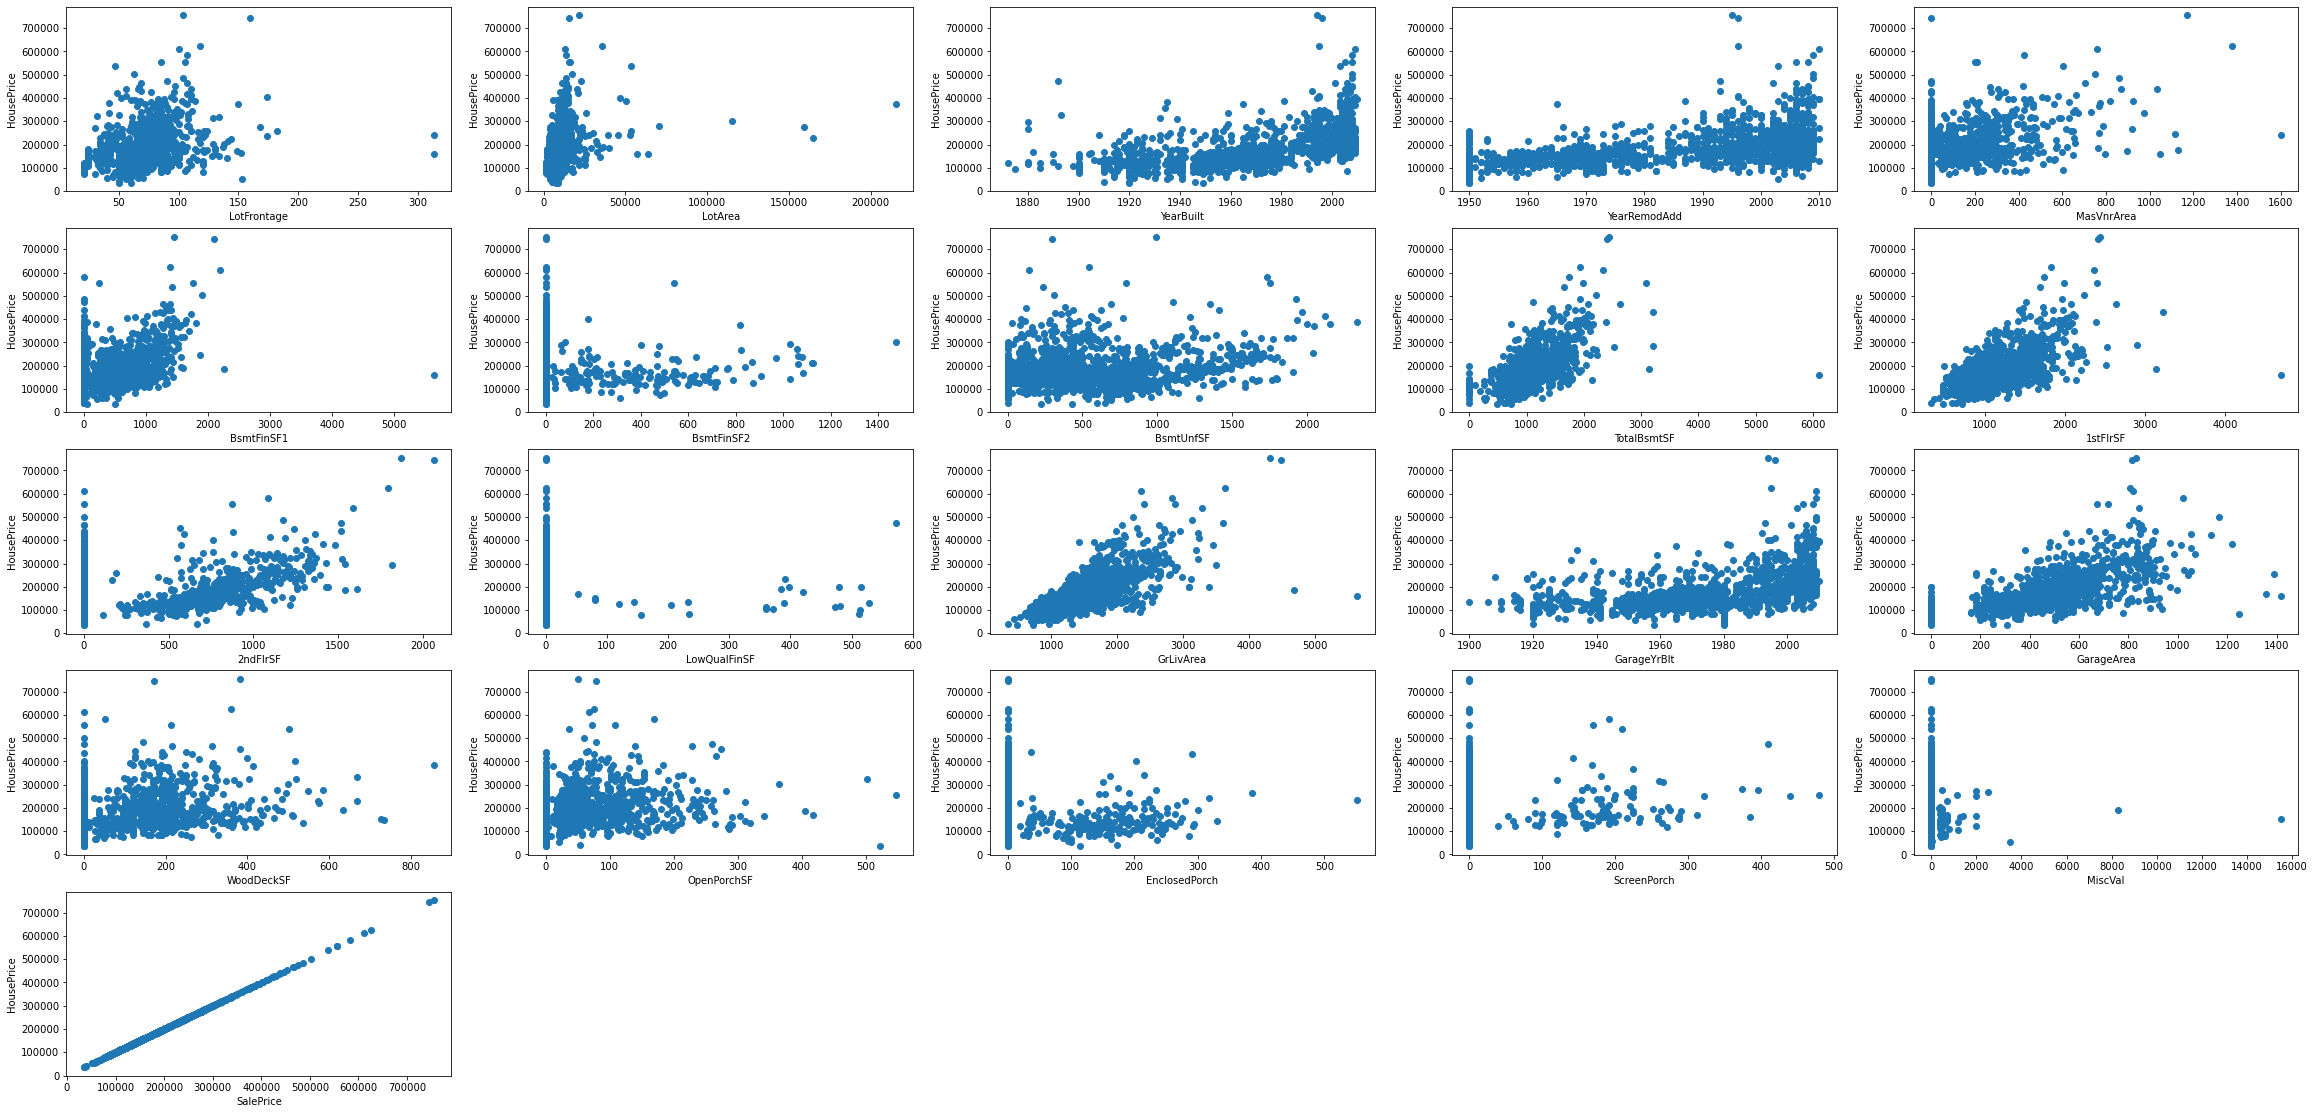

In [119]:
j=0
plt.figure(figsize=(40,40))
for column in continouscols:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('HousePrice')
    j+=1

In [120]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [121]:
observationval=train.groupby('OverallQual')['SalePrice'].mean()
observationval

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

In [122]:
pd.DataFrame(observationval)

,SalePrice
OverallQual,
1,50150.000000
2,51770.333333
3,87473.750000
4,108420.655172
5,133523.347607
6,161603.034759
7,207716.423197
8,274735.535714
9,367513.023256


In [123]:
observationvaldf=pd.DataFrame(observationval).sort_values(by='SalePrice',ascending=False)
observationvaldf

,SalePrice
OverallQual,
10,438588.388889
9,367513.023256
8,274735.535714
7,207716.423197
6,161603.034759
5,133523.347607
4,108420.655172
3,87473.750000
2,51770.333333


In [124]:
observationvaldf.reset_index(inplace=True)
observationvaldf

,OverallQual,SalePrice
0,10,438588.388889
1,9,367513.023256
2,8,274735.535714
3,7,207716.423197
4,6,161603.034759
5,5,133523.347607
6,4,108420.655172
7,3,87473.750000
8,2,51770.333333
9,1,50150.000000


<BarContainer object of 10 artists>

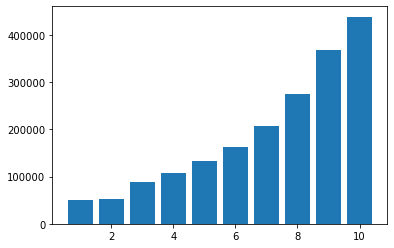

In [125]:
plt.bar(observationvaldf['OverallQual'],observationvaldf['SalePrice'])

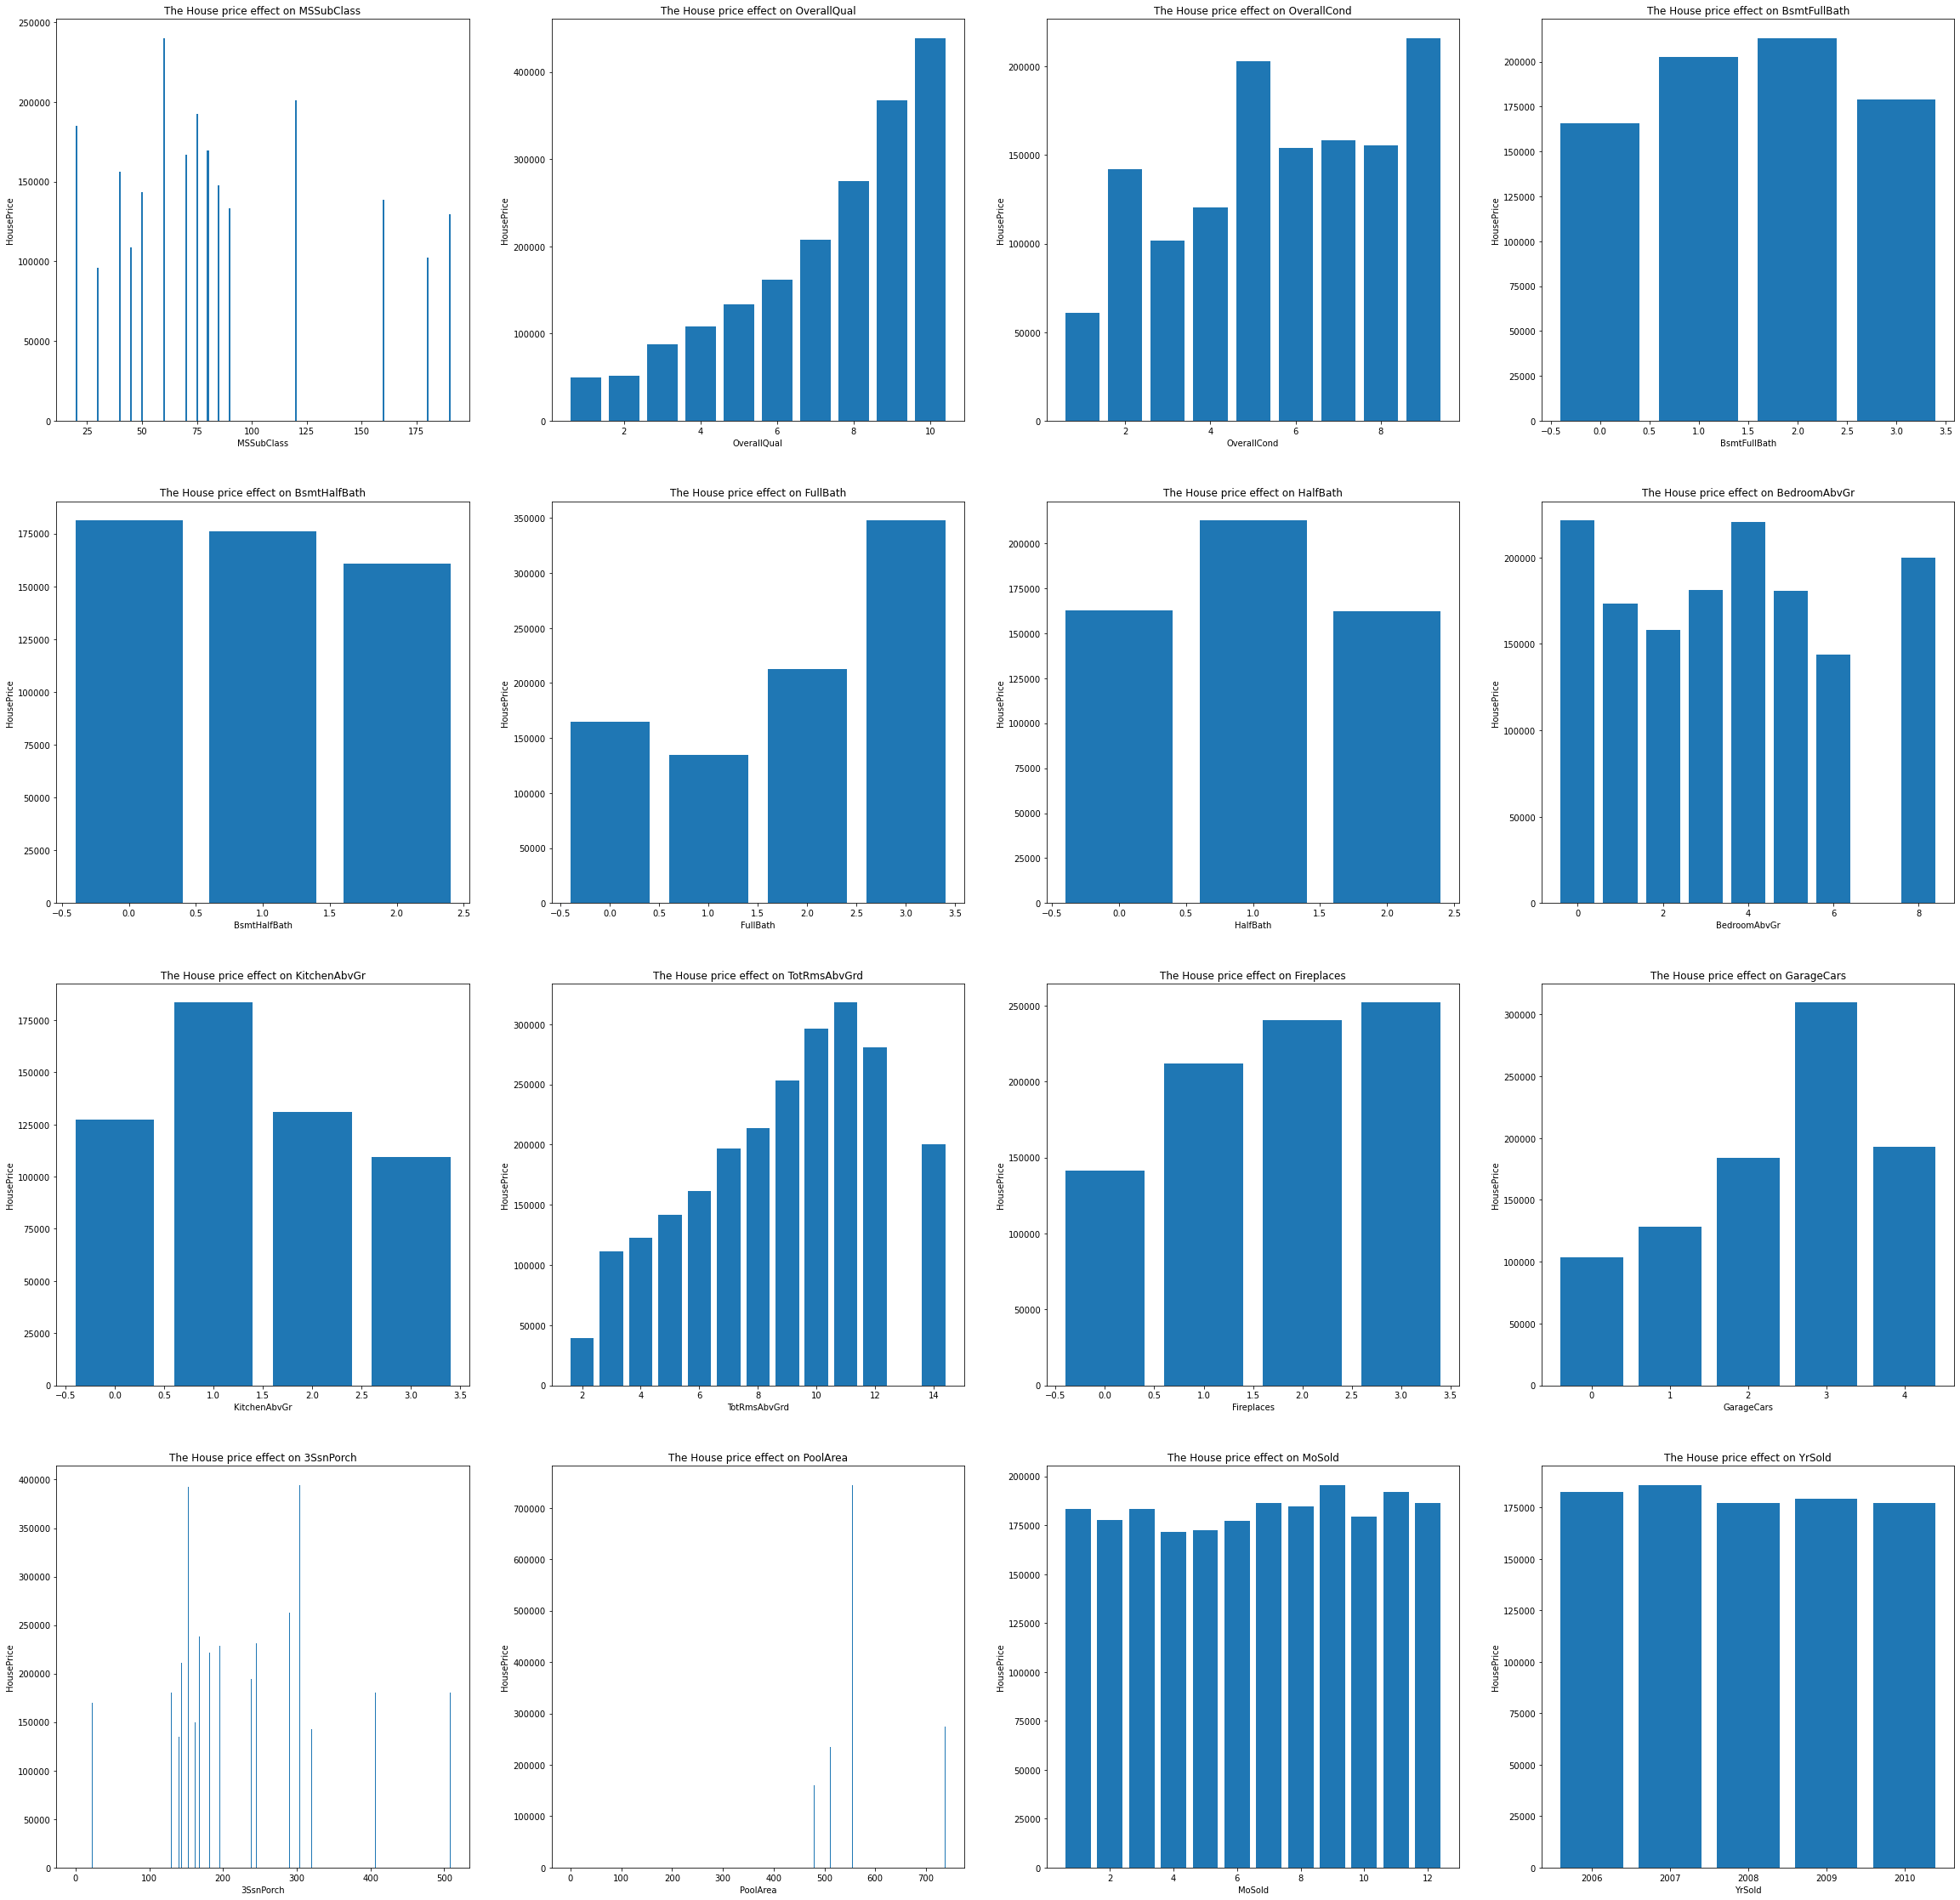

In [126]:
j=0
plt.figure(figsize=(40,40))
for column in descretecols:
    plt.subplot(4,4,j+1)
    observationval=train.groupby(column)['SalePrice'].mean()
    observationvaldf=pd.DataFrame(observationval).sort_values(by='SalePrice',ascending=False)
    observationvaldf.reset_index(inplace =True)
    plt.bar(observationvaldf[column],observationvaldf['SalePrice'])
    plt.title(f"The House price effect on {column}")
    plt.xlabel(column)
    plt.ylabel('HousePrice')
    j+=1

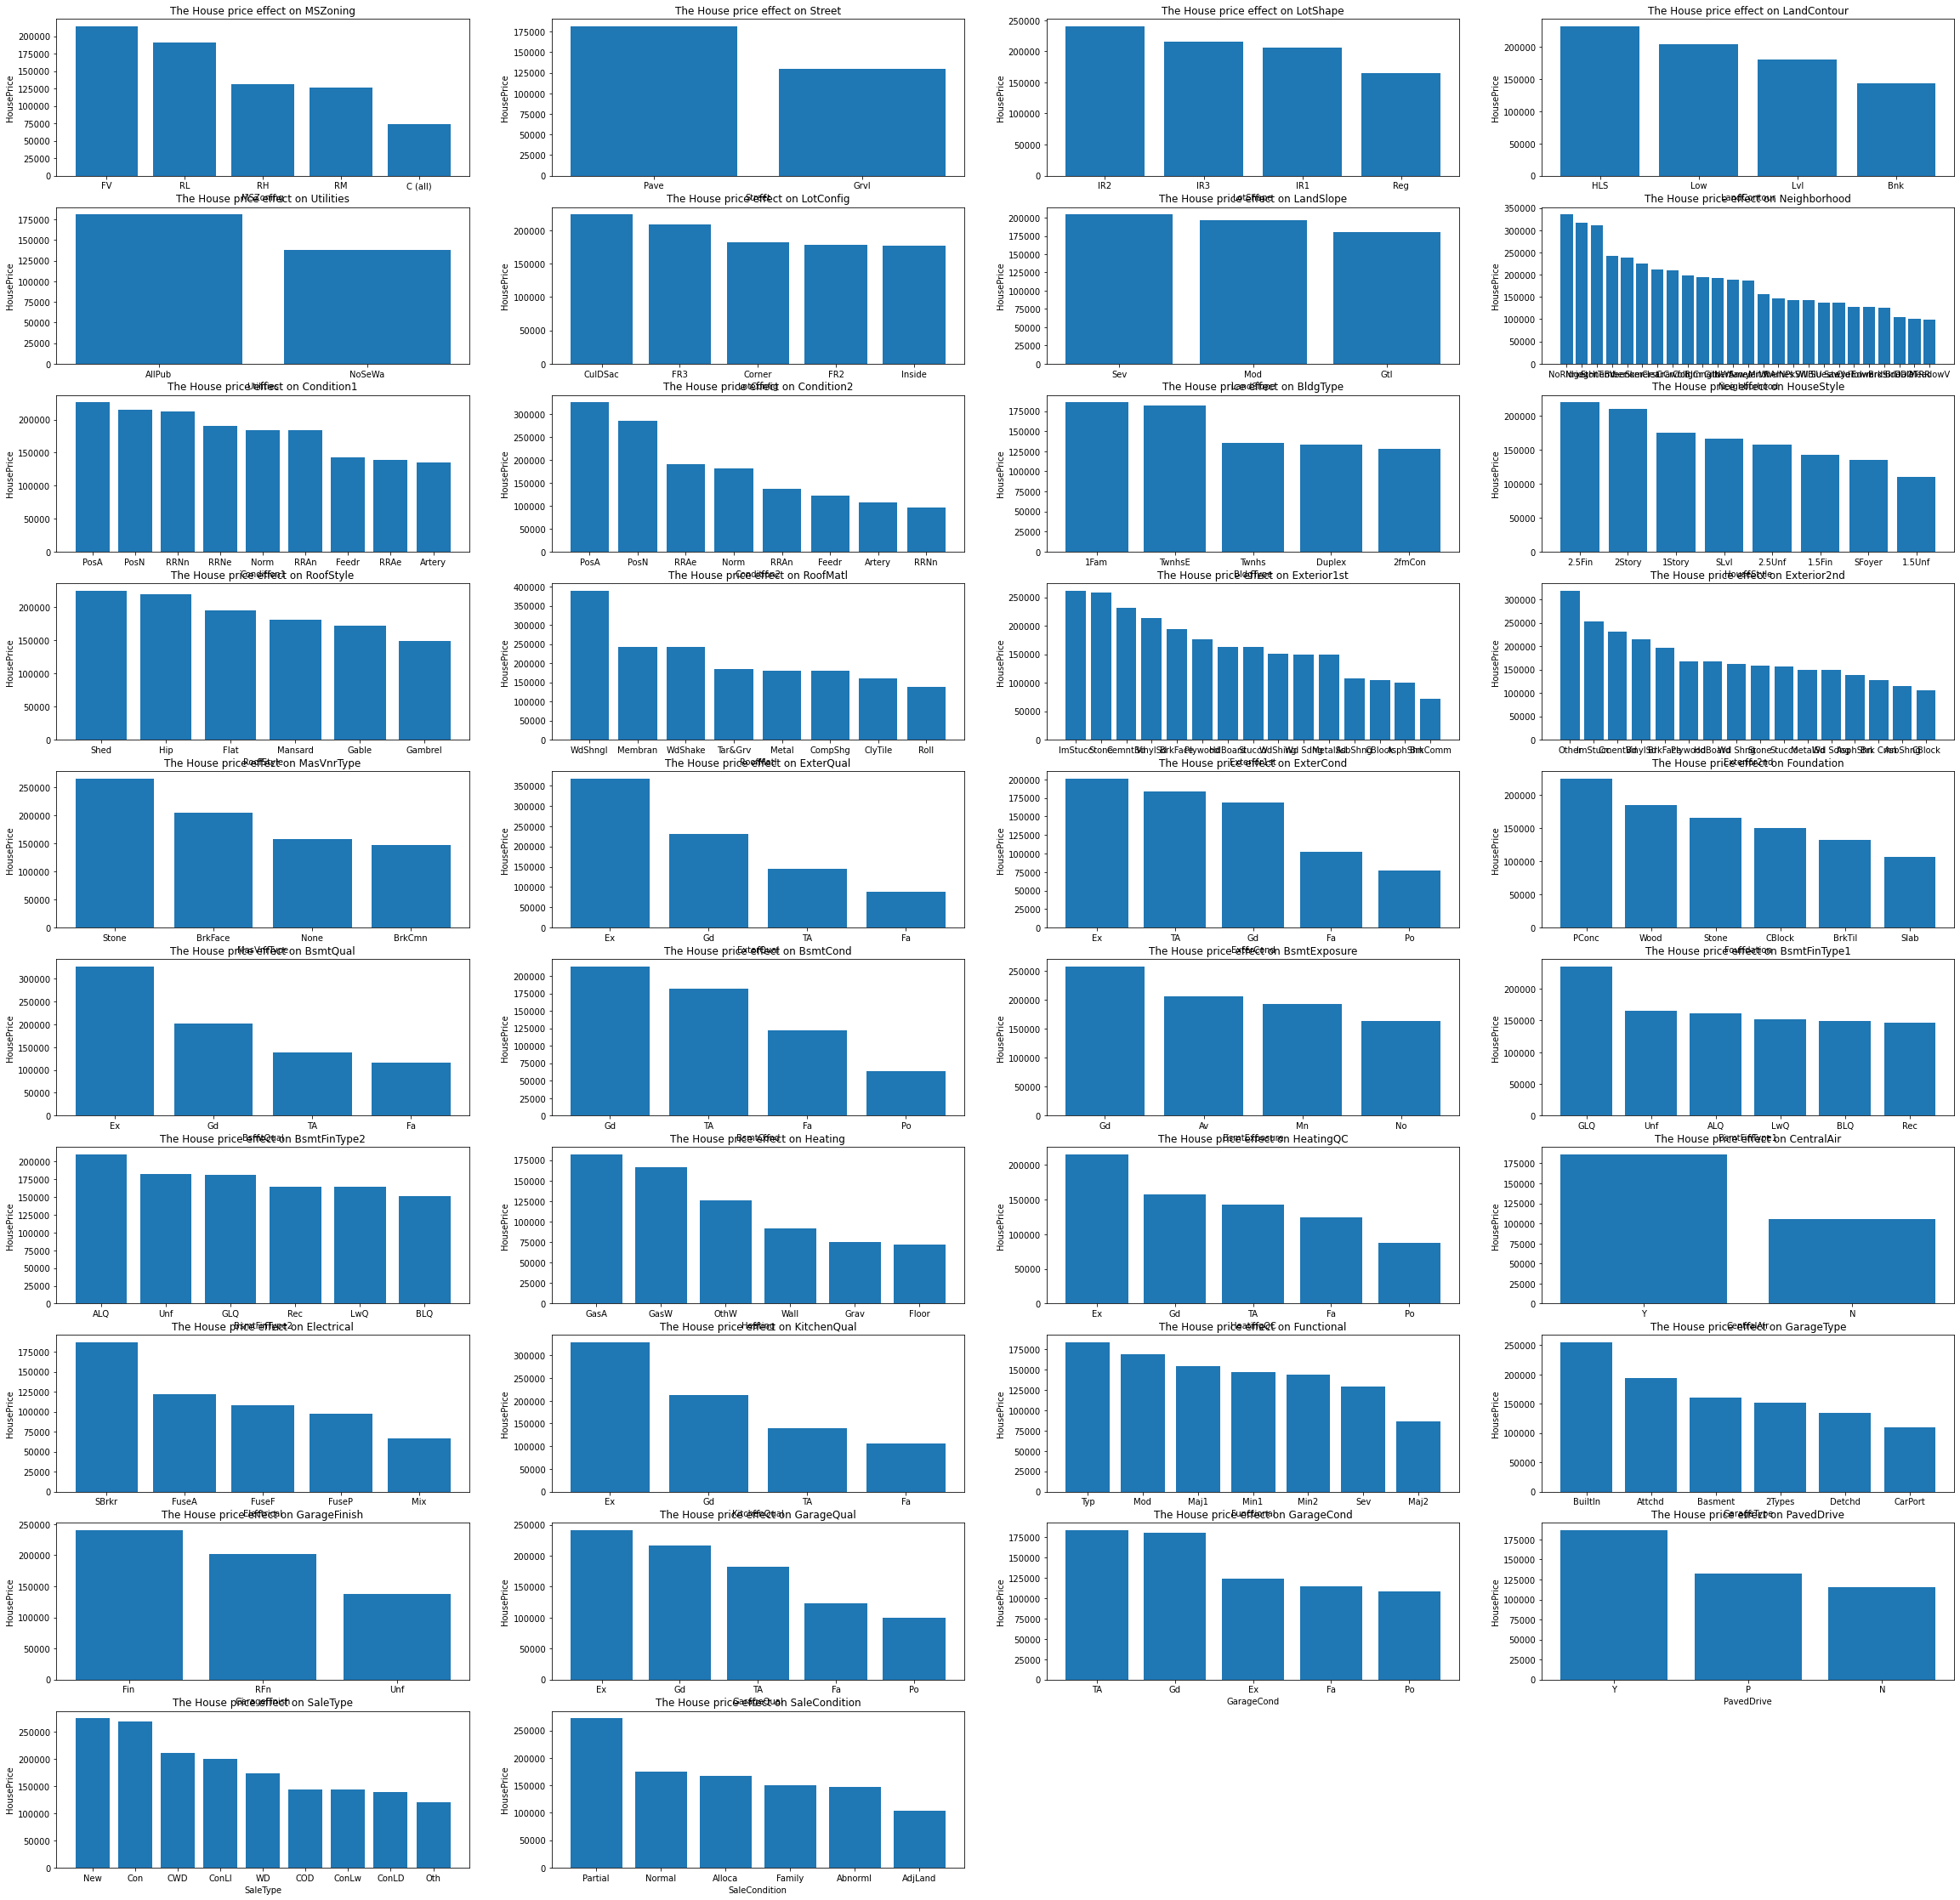

In [127]:
j=0
plt.figure(figsize=(40,40))
for column in objectcolumns:
    plt.subplot(10,4,j+1)
    observationval=train.groupby(column)['SalePrice'].mean()
    observationvaldf=pd.DataFrame(observationval).sort_values(by='SalePrice',ascending=False)
    observationvaldf.reset_index(inplace =True)
    plt.bar(observationvaldf[column],observationvaldf['SalePrice'])
    plt.title(f"The House price effect on {column}")
    plt.xlabel(column)
    plt.ylabel('HousePrice')
    j+=1

#### Handling Outliers

In [128]:
continouscols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [129]:
train.shape

(1460, 75)

In [130]:
train['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [131]:
upperlimit=train['LotFrontage'].mean()+train['LotFrontage'].std() *3
lowerlimit=train['LotFrontage'].mean()-train['LotFrontage'].std() *3

In [132]:
upperlimit

135.9467298969942

In [133]:
lowerlimit

3.780667363279747

In [134]:
train.loc[(train['LotFrontage'] >upperlimit),'LotFrontage'] = upperlimit
train.loc[(train['LotFrontage'] < lowerlimit),'LotFrontage'] = lowerlimit

In [135]:
for column in continouscols:
    upperlimit=train[column].mean()+train[column].std() *3
    lowerlimit=train[column].mean()-train[column].std() *3

    train.loc[(train[column] >upperlimit),column] = upperlimit
    train.loc[(train[column] < lowerlimit),column] = lowerlimit

In [136]:
lowerlimit

-57406.31275824897

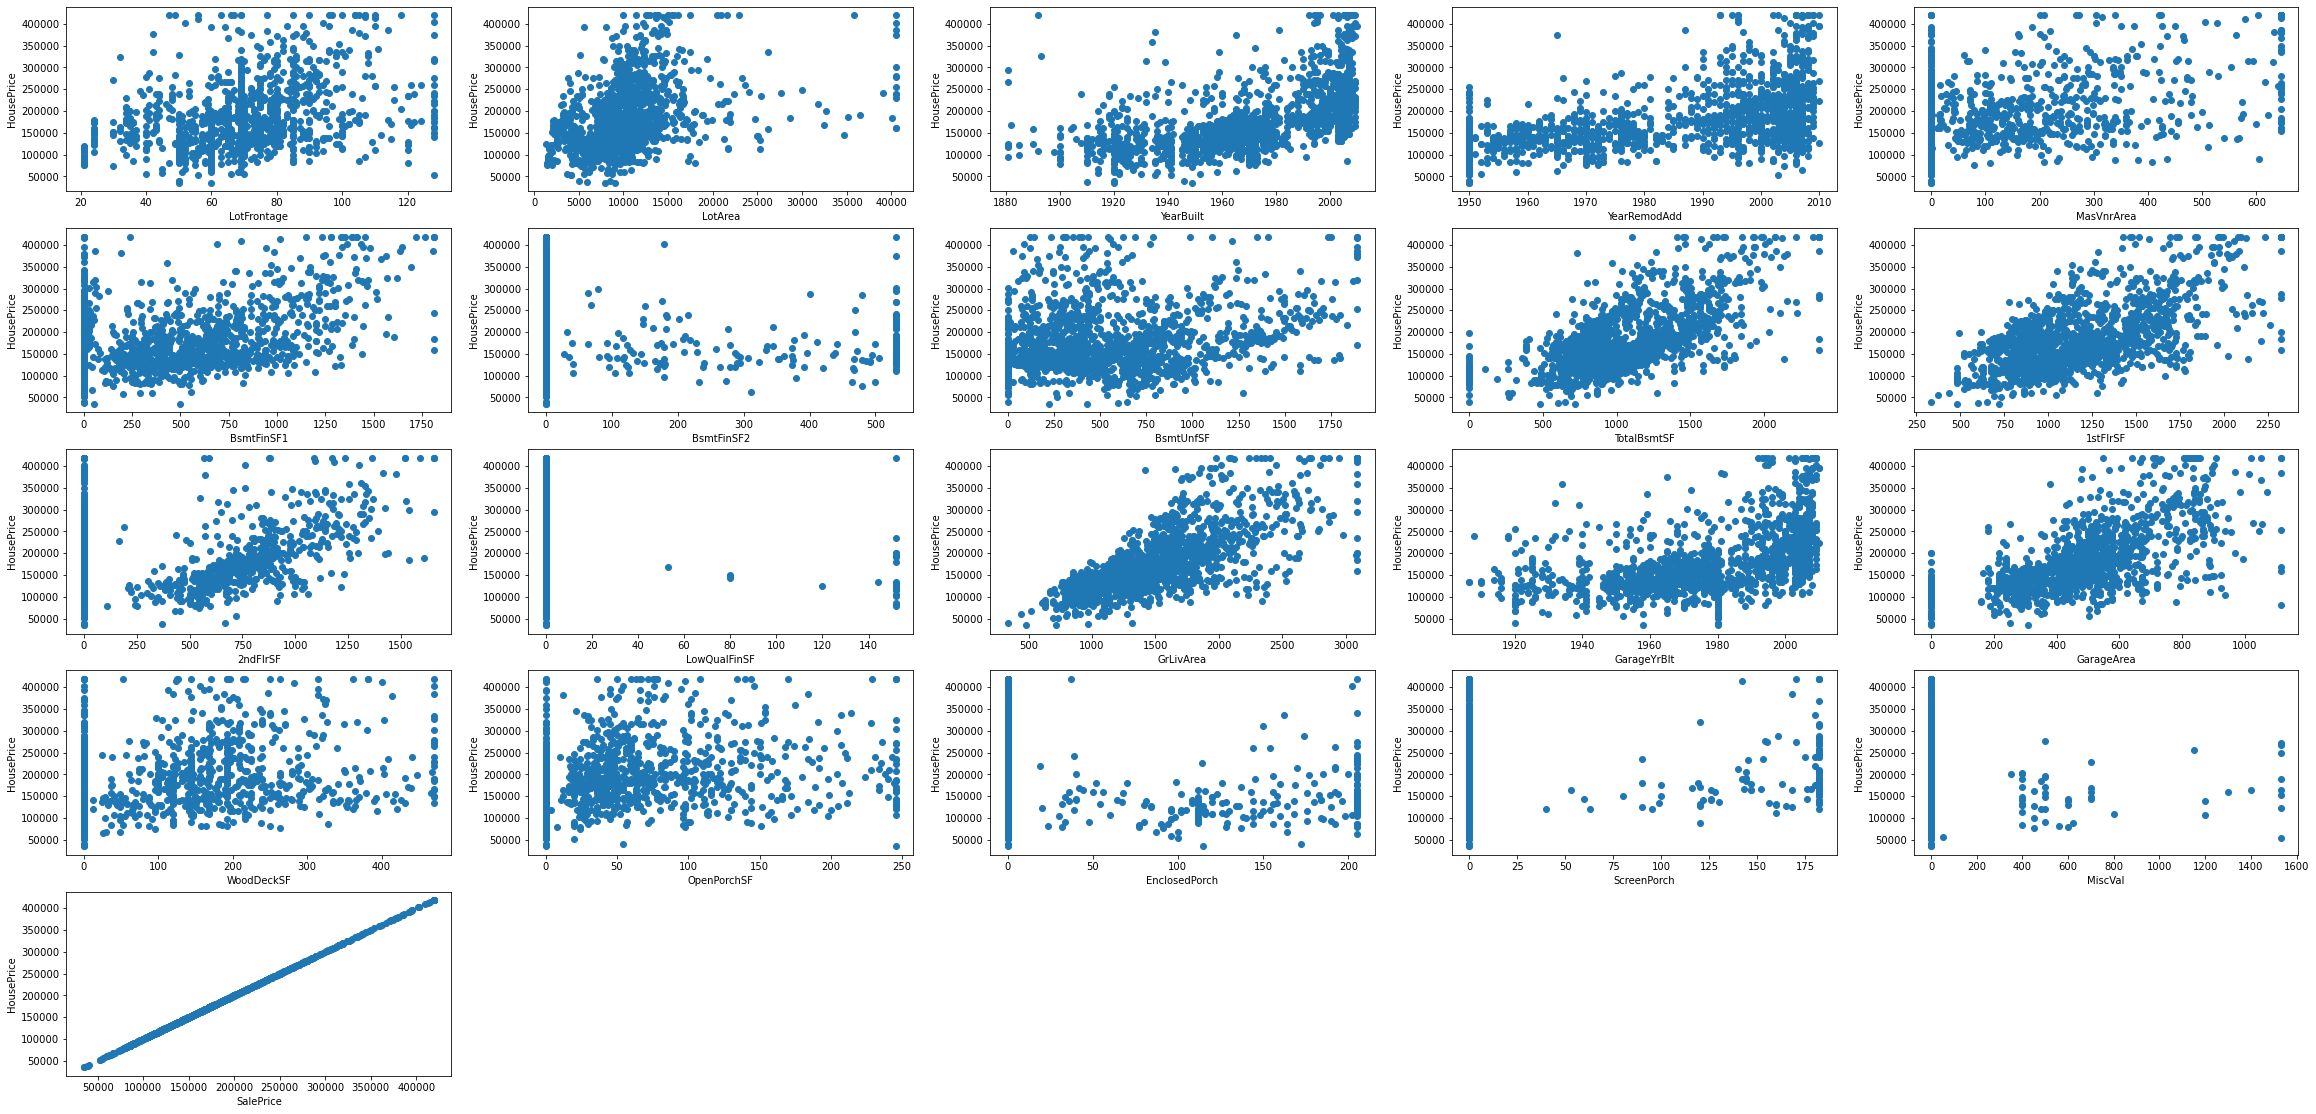

In [137]:
j=0
plt.figure(figsize=(40,40))
for column in continouscols:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [138]:
objectcolumns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [139]:
MSZoningLE=LabelEncoder()
MSZoningLE.fit_transform(train["MSZoning"])
StreetLE=LabelEncoder()
StreetLE.fit_transform(train["Street"])

array([1, 1, 1, ..., 1, 1, 1])

In [140]:
train[objectcolumns]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [141]:
trainobjectdf=train[objectcolumns]

In [142]:
from collections import defaultdict
defaultencoder=defaultdict(LabelEncoder)

#variable encoding
fittrainobjectdf=trainobjectdf.apply(lambda x: defaultencoder[x.name].fit_transform(x))

In [143]:
fittrainobjectdf

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


In [144]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,205.311555,0,0.0,0,0.0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.0,12,2008,WD,Normal,250000.0


In [145]:
train.drop(objectcolumns,axis=1,inplace=True)

In [146]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450.0,7,5,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.000000,0,0.0,0,0.0,2,2008,208500.0
1,20,80.0,9600.0,6,8,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.000000,0,0.0,0,0.0,5,2007,181500.0
2,60,68.0,11250.0,7,5,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.000000,0,0.0,0,0.0,9,2008,223500.0
3,70,60.0,9550.0,7,5,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,205.311555,0,0.0,0,0.0,2,2006,140000.0
4,60,84.0,14260.0,8,5,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.000000,0,0.0,0,0.0,12,2008,250000.0


In [147]:
updatedtrain=pd.concat([train,fittrainobjectdf],axis=1)
updatedtrain.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450.0,7,5,2003.0,2003.0,196.0,706.0,0.0,...,4,2,6,1,1,4,4,2,8,4
1,20,80.0,9600.0,6,8,1976.0,1976.0,0.0,978.0,0.0,...,4,3,6,1,1,4,4,2,8,4
2,60,68.0,11250.0,7,5,2001.0,2002.0,162.0,486.0,0.0,...,4,2,6,1,1,4,4,2,8,4
3,70,60.0,9550.0,7,5,1915.0,1970.0,0.0,216.0,0.0,...,4,2,6,5,2,4,4,2,8,0
4,60,84.0,14260.0,8,5,2000.0,2000.0,350.0,655.0,0.0,...,4,2,6,1,1,4,4,2,8,4


In [148]:
corrdf=updatedtrain.corr()
corrdf

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
MSSubClass,1.000000,-0.400658,-0.279702,0.032628,-0.059316,0.027944,0.040581,0.020520,-0.073235,-0.066358,...,0.051945,0.010129,0.003711,0.090719,0.012301,0.007630,0.002927,-0.059925,0.012464,-0.024940
LotFrontage,-0.400658,1.000000,0.455607,0.237468,-0.059285,0.126277,0.076991,0.187109,0.146296,0.044964,...,0.063530,-0.185197,0.030656,-0.236666,-0.222537,0.051435,0.043985,0.097751,-0.033825,0.066170
LotArea,-0.279702,0.455607,1.000000,0.181943,-0.015925,0.037913,0.038069,0.153834,0.239187,0.082894,...,0.059112,-0.114712,-0.044227,-0.175576,-0.168933,0.019339,0.038518,0.014115,0.001833,0.045476
OverallQual,0.032628,0.237468,0.181943,1.000000,-0.091932,0.573183,0.550684,0.416804,0.230085,-0.085303,...,0.254127,-0.555348,0.161047,-0.297995,-0.538529,0.090562,0.144988,0.229393,-0.060472,0.193703
OverallCond,-0.059316,-0.059285,-0.015925,-0.091932,1.000000,-0.376205,0.073741,-0.131177,-0.044549,0.054472,...,0.062664,0.067984,0.094040,0.163126,0.191063,-0.094761,-0.032236,-0.062236,0.095267,0.017758
YearBuilt,0.027944,0.126277,0.037913,0.573183,-0.376205,1.000000,0.593659,0.328898,0.252930,-0.063908,...,0.338915,-0.359384,0.154651,-0.443934,-0.590385,0.304135,0.246913,0.427485,-0.052367,0.201311
YearRemodAdd,0.040581,0.076991,0.038069,0.550684,0.073741,0.593659,1.000000,0.182833,0.126435,-0.088854,...,0.344514,-0.452431,0.079903,-0.271764,-0.456786,0.130241,0.150579,0.168457,0.019647,0.221687
MasVnrArea,0.020520,0.187109,0.153834,0.416804,-0.131177,0.328898,0.182833,1.000000,0.250260,-0.076081,...,0.116759,-0.263543,0.092105,-0.178620,-0.278422,0.113714,0.071267,0.154841,-0.062240,0.085328
BsmtFinSF1,-0.073235,0.146296,0.239187,0.230085,-0.044549,0.252930,0.126435,0.250260,1.000000,-0.041027,...,0.157218,-0.178807,0.044579,-0.242146,-0.246545,0.127551,0.100624,0.197006,0.012959,0.027687
BsmtFinSF2,-0.066358,0.044964,0.082894,-0.085303,0.054472,-0.063908,-0.088854,-0.076081,-0.041027,1.000000,...,0.015672,0.079340,-0.108940,-0.016654,0.044394,0.045400,-0.008157,0.067335,-0.029363,-0.057059


In [149]:
corrdf['SalePrice']

MSSubClass      -0.088248
LotFrontage      0.362129
LotArea          0.381589
OverallQual      0.810469
OverallCond     -0.079194
YearBuilt        0.550119
YearRemodAdd     0.534087
MasVnrArea       0.468188
BsmtFinSF1       0.398349
BsmtFinSF2      -0.039318
BsmtUnfSF        0.218271
TotalBsmtSF      0.649209
1stFlrSF         0.629285
2ndFlrSF         0.306770
LowQualFinSF    -0.052332
GrLivArea        0.722471
BsmtFullBath     0.239062
BsmtHalfBath    -0.026792
FullBath         0.569415
HalfBath         0.289295
BedroomAbvGr     0.169804
KitchenAbvGr    -0.143346
TotRmsAbvGrd     0.533566
Fireplaces       0.477834
GarageYrBlt      0.488076
GarageCars       0.663012
GarageArea       0.650517
WoodDeckSF       0.339119
OpenPorchSF      0.358735
EnclosedPorch   -0.152807
3SsnPorch        0.050598
ScreenPorch      0.100159
PoolArea         0.059439
MiscVal         -0.041144
MoSold           0.060833
YrSold          -0.029711
SalePrice        1.000000
MSZoning        -0.180951
Street      

In [150]:
corrcolumns=abs(corrdf['SalePrice']).sort_values(ascending=False)
corrcolumns

SalePrice        1.000000
OverallQual      0.810469
GrLivArea        0.722471
GarageCars       0.663012
GarageArea       0.650517
TotalBsmtSF      0.649209
ExterQual        0.641007
1stFlrSF         0.629285
BsmtQual         0.624198
KitchenQual      0.590739
FullBath         0.569415
GarageFinish     0.558118
YearBuilt        0.550119
YearRemodAdd     0.534087
TotRmsAbvGrd     0.533566
GarageYrBlt      0.488076
Fireplaces       0.477834
MasVnrArea       0.468188
HeatingQC        0.417038
Foundation       0.400229
BsmtFinSF1       0.398349
LotArea          0.381589
LotFrontage      0.362129
OpenPorchSF      0.358735
WoodDeckSF       0.339119
GarageType       0.321506
2ndFlrSF         0.306770
BsmtExposure     0.298020
HalfBath         0.289295
CentralAir       0.267532
LotShape         0.261493
Electrical       0.249019
PavedDrive       0.245371
BsmtFullBath     0.239062
SaleCondition    0.231494
BsmtUnfSF        0.218271
RoofStyle        0.215822
Neighborhood     0.214781
HouseStyle  

In [151]:
corrcolumns>0.4

SalePrice         True
OverallQual       True
GrLivArea         True
GarageCars        True
GarageArea        True
TotalBsmtSF       True
ExterQual         True
1stFlrSF          True
BsmtQual          True
KitchenQual       True
FullBath          True
GarageFinish      True
YearBuilt         True
YearRemodAdd      True
TotRmsAbvGrd      True
GarageYrBlt       True
Fireplaces        True
MasVnrArea        True
HeatingQC         True
Foundation        True
BsmtFinSF1       False
LotArea          False
LotFrontage      False
OpenPorchSF      False
WoodDeckSF       False
GarageType       False
2ndFlrSF         False
BsmtExposure     False
HalfBath         False
CentralAir       False
LotShape         False
Electrical       False
PavedDrive       False
BsmtFullBath     False
SaleCondition    False
BsmtUnfSF        False
RoofStyle        False
Neighborhood     False
HouseStyle       False
MSZoning         False
BedroomAbvGr     False
EnclosedPorch    False
KitchenAbvGr     False
GarageCond 

In [152]:
(corrcolumns[corrcolumns>0.4])

SalePrice       1.000000
OverallQual     0.810469
GrLivArea       0.722471
GarageCars      0.663012
GarageArea      0.650517
TotalBsmtSF     0.649209
ExterQual       0.641007
1stFlrSF        0.629285
BsmtQual        0.624198
KitchenQual     0.590739
FullBath        0.569415
GarageFinish    0.558118
YearBuilt       0.550119
YearRemodAdd    0.534087
TotRmsAbvGrd    0.533566
GarageYrBlt     0.488076
Fireplaces      0.477834
MasVnrArea      0.468188
HeatingQC       0.417038
Foundation      0.400229
Name: SalePrice, dtype: float64

In [153]:
len(corrcolumns[corrcolumns>0.4])

20

In [154]:
finalcolumns=(corrcolumns[corrcolumns>0.4]).index
finalcolumns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'ExterQual', '1stFlrSF', 'BsmtQual', 'KitchenQual',
       'FullBath', 'GarageFinish', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd',
       'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'HeatingQC', 'Foundation'],
      dtype='object')

In [155]:
finaldf=updatedtrain[finalcolumns]
finaldf

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,208500.0,7,1710.0,2,548.0,856.0,2,856.0,2,2,2,1,2003.0,2003.0,8,2003.0,0,196.0,0,2
1,181500.0,6,1262.0,2,460.0,1262.0,3,1262.0,2,3,2,1,1976.0,1976.0,6,1976.0,1,0.0,0,1
2,223500.0,7,1786.0,2,608.0,920.0,2,920.0,2,2,2,1,2001.0,2002.0,6,2001.0,1,162.0,0,2
3,140000.0,7,1717.0,3,642.0,756.0,3,961.0,3,2,1,2,1915.0,1970.0,7,1998.0,1,0.0,2,0
4,250000.0,8,2198.0,3,836.0,1145.0,2,1145.0,2,2,2,1,2000.0,2000.0,9,2000.0,1,350.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,6,1647.0,2,460.0,953.0,3,953.0,2,3,2,1,1999.0,2000.0,7,1999.0,1,0.0,0,2
1456,210000.0,6,2073.0,2,500.0,1542.0,3,2073.0,2,3,2,2,1978.0,1988.0,7,1978.0,2,119.0,4,1
1457,266500.0,7,2340.0,1,252.0,1152.0,0,1188.0,3,2,2,1,1941.0,2006.0,9,1941.0,2,0.0,0,4
1458,142125.0,5,1078.0,1,240.0,1078.0,3,1078.0,3,2,1,2,1950.0,1996.0,5,1950.0,0,0.0,2,1


In [156]:
y=finaldf['SalePrice']

In [164]:
X=finaldf.drop(['SalePrice'],axis=1)

In [165]:
X.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,7,1710.0,2,548.0,856.0,2,856.0,2,2,2,1,2003.0,2003.0,8,2003.0,0,196.0,0,2
1,6,1262.0,2,460.0,1262.0,3,1262.0,2,3,2,1,1976.0,1976.0,6,1976.0,1,0.0,0,1
2,7,1786.0,2,608.0,920.0,2,920.0,2,2,2,1,2001.0,2002.0,6,2001.0,1,162.0,0,2
3,7,1717.0,3,642.0,756.0,3,961.0,3,2,1,2,1915.0,1970.0,7,1998.0,1,0.0,2,0
4,8,2198.0,3,836.0,1145.0,2,1145.0,2,2,2,1,2000.0,2000.0,9,2000.0,1,350.0,0,2


In [159]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [160]:
# from sklearn.preprocessing import StandardScaler

In [161]:
# scaler = StandardScaler()
# ### Fit vs fit_transform
# df_scaled=scaler.fit_transform(x)

In [162]:
# pd.DataFrame(df_scaled,columns=x.columns)

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [169]:
X_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
912,5,1015.0,1,450.0,768.0,3,1015.0,3,3,1,2,1925.0,1950.0,6,1925.0,0,0.0,4,0
373,5,1319.0,1,270.0,608.0,3,1319.0,3,3,1,2,1953.0,1953.0,5,1953.0,0,0.0,4,2
20,8,2376.0,3,853.0,1158.0,2,1158.0,0,2,3,1,2005.0,2006.0,9,2005.0,1,380.0,0,2
800,6,1688.0,2,603.0,616.0,3,616.0,2,2,2,1,1997.0,1997.0,8,1997.0,0,0.0,2,2
152,6,1993.0,2,495.0,825.0,3,1097.0,3,3,2,1,1971.0,1971.0,8,1971.0,1,252.0,2,1


In [170]:
sc_X=StandardScaler()
sc_X.fit_transform(X_train)

array([[-0.83213659, -1.01059494, -1.03745257, ..., -0.62631896,
         1.41526862, -1.91922505],
       [-0.83213659, -0.39455908, -1.03745257, ..., -0.62631896,
         1.41526862,  0.85313962],
       [ 1.35409374,  1.7473814 ,  1.63663703, ...,  1.73510508,
        -0.87153696,  0.85313962],
       ...,
       [ 2.08283718,  2.43028958,  1.63663703, ...,  1.03910641,
        -0.87153696,  0.85313962],
       [ 0.62535029, -0.06425038,  0.29959223, ..., -0.62631896,
        -0.87153696,  0.85313962],
       [ 1.35409374,  0.9246493 ,  1.63663703, ...,  3.38382178,
        -0.87153696,  0.85313962]])

In [172]:
pd.DataFrame(sc_X.fit_transform(X_train),columns=X_train.columns)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,-0.832137,-1.010595,-1.037453,-0.128922,-0.709477,0.665680,-0.400232,0.829465,0.788012,-1.044479,0.971066,-1.539255,-1.693863,-0.329486,-2.246386,-0.955666,-0.626319,1.415269,-1.919225
1,-0.832137,-0.394559,-1.037453,-0.976687,-1.100846,0.665680,0.424259,0.829465,0.788012,-1.044479,0.971066,-0.614266,-1.548422,-0.955388,-1.082420,-0.955666,-0.626319,1.415269,0.853140
2,1.354094,1.747381,1.636637,1.769129,0.244484,-0.763574,-0.012396,-2.579568,-0.385965,2.598720,-0.258710,1.103571,1.021023,1.548219,1.079232,0.597101,1.735105,-0.871537,0.853140
3,-0.103393,0.353195,0.299592,0.591678,-1.081278,0.665680,-1.482377,-0.306880,-0.385965,0.777121,-0.258710,0.839288,0.584702,0.922317,0.746670,-0.955666,-0.626319,0.271866,0.853140
4,-0.103393,0.971257,0.299592,0.083019,-0.570052,0.665680,-0.177837,0.829465,0.788012,0.777121,-0.258710,-0.019630,-0.675780,0.922317,-0.334156,0.597101,0.939678,0.271866,-0.533043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,-0.103393,0.807116,0.299592,0.916655,-1.409049,0.665680,0.158469,-1.443224,0.788012,0.777121,0.971066,-2.199962,0.730143,0.296415,0.996091,0.597101,-0.626319,-0.871537,-1.919225
1018,0.625350,-0.116938,0.299592,-0.176020,-0.807320,-0.763574,-1.178617,-0.306880,-0.385965,0.777121,-1.488486,1.136606,1.021023,0.922317,1.120802,0.597101,-0.626319,-0.871537,0.853140
1019,2.082837,2.430290,1.636637,1.792678,0.963624,-3.622084,0.850065,-2.579568,-2.733921,0.777121,-1.488486,1.202677,1.117984,2.800022,1.203942,0.597101,1.039106,-0.871537,0.853140
1020,0.625350,-0.064250,0.299592,-0.722358,-0.998112,0.665680,-0.896554,0.829465,0.788012,-1.044479,0.971066,-1.704432,0.148381,0.296415,-2.038535,-0.955666,-0.626319,-0.871537,0.853140


In [ ]:
X_test=pd.DataFrame